# Using ULMO to fetch climatology data and see temperature trends

## Data from meteorological stations will be pulled and analyzed

install : !pip install ulmo

In [30]:
import ulmo
import pandas as pd
import matplotlib.pyplot as plt

## Data is from  National Climatic Data Center Global Historical Climate Network 

## Below, we read in climate data from all the weather stations in Spain

In [9]:
st = ulmo.ncdc.ghcn_daily.get_stations(country='SP', as_dataframe=True)

In [10]:
st.head()

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
SP000003195,SP,0,00003195,40.4117,-3.6781,667.0,NaN,MADRID - RETIRO,NaN,NaN,8222,SP000003195
SP000004452,SP,0,00004452,38.8831,-6.8292,185.0,NaN,BADAJOZ/TALAVERA LA REAL,NaN,NaN,8330,SP000004452
SP000006155,SP,0,00006155,36.6667,-4.4881,7.0,NaN,MALAGA AEROPUERTO,NaN,NaN,8482,SP000006155
SP000007038,SP,0,00007038,37.9769,0.7106,1.0,NaN,TORREVIEJA,NaN,NaN,8433,SP000007038
SP000008027,SP,0,00008027,43.3075,-2.0392,251.0,NaN,SAN SEBASTIAN - IGUELDO,GSN,NaN,8027,SP000008027


## Let's focus our analysis towards Barcelona

In [11]:
st[st.name.str.contains('BARCELONA')]

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
SP000008181,SP,0,00008181,41.2928,2.0697,4.0,NaN,BARCELONA/AEROPUERTO,GSN,NaN,8181,SP000008181
SPE00119891,SP,E,00119891,41.4192,2.1253,412.0,NaN,BARCELONA,NaN,NaN,NaN,SPE00119891


In [12]:
data = ulmo.ncdc.ghcn_daily.get_data('SPE00119891', as_dataframe = True)

/Users/pranavbarot/anaconda/lib/python3.6/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
/Users/pranavbarot/anaconda/lib/python3.6/site-packages/ulmo/ncdc/ghcn_daily/core.py:95: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  daily_index = element_df.resample('D').index.copy()


## TMAX = Maximum daily temperature

The actual value in degrees celsius is the Value presented in the table, divided by 10.0

In [14]:
daily_max = data['TMAX'].copy()

In [15]:
daily_max.head()

,value,mflag,qflag,sflag
month_period,,,,
1926-01-01,131,NaN,NaN,E
1926-01-02,145,NaN,NaN,E
1926-01-03,102,NaN,NaN,E
1926-01-04,124,NaN,NaN,E
1926-01-05,100,NaN,NaN,E


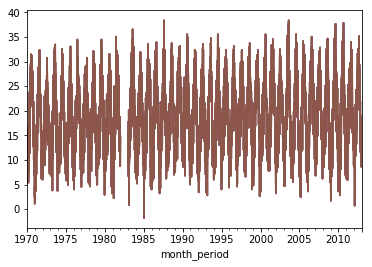

In [28]:
plt.plot(daily_max['value']['1970':'2012'])
plt.show()

## Means tell us almost nothing about trends, rolling means give more info about trends over time

Checking rolling means for each year (window = 365)

/Users/pranavbarot/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=365,center=False).mean()
  """Entry point for launching an IPython kernel.


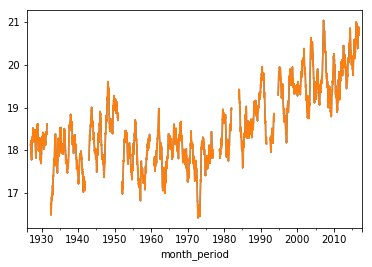

In [35]:
pd.rolling_mean(daily_max.value, window=365).plot()
plt.show()

In [39]:
daily_max.value = daily_max.value.astype('float')

## Interesting increase noticed after 1980 or so

/Users/pranavbarot/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


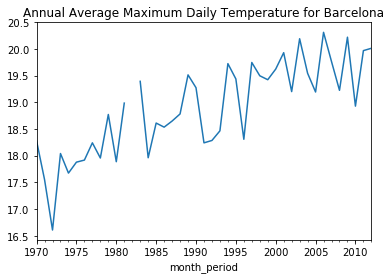

In [44]:
daily_max['1970':'2012'].value.resample('A').plot()
plt.title('Annual Average Maximum Daily Temperature for Barcelona')
plt.show()